Problem 3  forest fire

Functions 

In [8]:
import numpy as np
import random 
from tkinter import *
from PIL import Image
from PIL import ImageTk as itk
import time

def runSimulation(N,maxRuns,maxFires,f,p):
  
    nFires=0
    sizesOfFire=[]
    setFire=False

    resolution =700
    root=Tk()
    root.title("Forrest fire")
    root.geometry( str(int(resolution*1.5)) + 'x'  +  str(int(resolution*1.1)) )
    canvas=Canvas(root)
    canvas.place(x=resolution/20, y=resolution/20, height= resolution, width= resolution)


    def checkIfItsTree(data,row,column):
        nRows=data.shape[0]
        nCols=data.shape[1]
        if 0<=column <nCols and 0<=row<nRows:
            if data[row,column]==1:
                return True
            else:
                return False
        else:
                return False 
    
    def releaseLightning(data,N,positionLightning):
        data[positionLightning[0],positionLightning[1]]=2 
        sizeOfFire=1
        row=positionLightning[0]
        col=positionLightning[1]
        burningTrees=[[row,col]]
        for burningTree in burningTrees:
            neighbors=np.array([[burningTree[0],burningTree[1]-1],[burningTree[0]-1,burningTree[1]],[burningTree[0]+1,burningTree[1]],[burningTree[0],burningTree[1]+1]])
            for neighbor in neighbors:
                if checkIfItsTree(data,neighbor[0],neighbor[1]):
                    data[neighbor[0],neighbor[1]]=2
                    sizeOfFire=sizeOfFire+1
                    newlyBurntTree=[neighbor[0],neighbor[1]]
                    burningTrees.append(newlyBurntTree)
        return data,sizeOfFire
                
    #data=np.zeros((N, N))
    rgbData=np.zeros((N,N,3))
    data=np.random.randint(0, 2, size=(N, N))
    runs=0
    while  runs<maxRuns and  nFires<maxFires:#runs<10**4:#True: 
        runs+=1
        data[(np.random.rand(N,N)<p)& (data==0)] = 1
        q=random.random()
        if q<f:
            positionLightning=np.random.randint(N, size=2)
            if data[positionLightning[0],positionLightning[1]]==1:#set tree on fire
                setFire=True 
                nFires+=1
                data,sizeOfFire=releaseLightning(data,N,positionLightning)
                sizesOfFire.append(sizeOfFire)
        rgbData[:,:,:]=0
        rgbData[:,:,0]= (data==2)*255
        rgbData[:,:,1]= (data==1)*255

        img =itk.PhotoImage(Image.fromarray(np.uint8(rgbData),'RGB').resize((resolution,resolution),resample=4))#4
        canvas.create_image((0,0),anchor=NW,image=img) 
        root.title('Fires:' + str(nFires)+'  Runs:' + str(runs))
        root.update()
        #if setFire:
            #time.sleep(0.05)
            #setFire=False
        data[data==2]=0             
    root.mainloop()
    return sizesOfFire



In [2]:
import numpy as np
import random 
from tkinter import *
from PIL import Image
from PIL import ImageTk as itk
import time



def getValues(sizesOfFires,N):
    sizesOfFires.sort()
    k=len(sizesOfFires)
    C=np.array(range(k+1)[1:])
    C=np.flip(C)
    C=np.array(C)
    C=(C/k)
    sizesOfFires=np.array(sizesOfFires)
    x=sizesOfFires/N**2

    return x,C

def checkIfItsTree(data,row,column):
        nRows=data.shape[0]
        nCols=data.shape[1]
        if 0<=column <nCols and 0<=row<nRows:
            if data[row,column]==1:
                return True
            else:
                return False
        else:
                return False 
    
def releaseLightning(data,N,positionLightning):
    if data[positionLightning[0],positionLightning[1]]==1:
        data[positionLightning[0],positionLightning[1]]=2 
        sizeOfFire=1
        row=positionLightning[0]
        col=positionLightning[1]
        burningTrees=[[row,col]]
        for burningTree in burningTrees:
            neighbors=np.array([[burningTree[0],burningTree[1]-1],[burningTree[0]-1,burningTree[1]],[burningTree[0]+1,burningTree[1]],[burningTree[0],burningTree[1]+1]])
            for neighbor in neighbors:
                if checkIfItsTree(data,neighbor[0],neighbor[1]):
                    data[neighbor[0],neighbor[1]]=2
                    sizeOfFire=sizeOfFire+1
                    newlyBurntTree=[neighbor[0],neighbor[1]]
                    burningTrees.append(newlyBurntTree)
        return data,sizeOfFire
    else: 
        return data,0
def createRandomForrestWithnTrees(N,numberOfTrees):
    data=np.zeros((1,N*N))[0]
    data[0:numberOfTrees]=1
    np.random.shuffle(data)
    data=data.reshape((N,N))
    return data

def runSimulationGenarateRandomForest(N,maxRuns,maxFires,f,p):


    nFires=0
    sizesOfFire=[]
    sizesOfFireRandom=[]
    
    data=np.random.randint(0, 2, size=(N, N))
    runs=0
    while  runs<maxRuns and  nFires<maxFires:#runs<10**4:#True: 
        runs+=1
        data[(np.random.rand(N,N)<p)& (data==0)] = 1
        q=random.random()
        if q<f:
            sizeOfFire=0
            sizeOfFireRandom=0
            positionLightning=np.random.randint(N, size=2)
            if data[positionLightning[0],positionLightning[1]]==1:#set tree on fire
                setFire=True 
                nFires+=1
                numberOfTreesBeforFire= np.count_nonzero(data==1)#data.count(1)
                data,sizeOfFire=releaseLightning(data,N,positionLightning)
                sizesOfFire.append(sizeOfFire)

                #Create random forest
                dataRandom=createRandomForrestWithnTrees(N,numberOfTreesBeforFire)

                placesWithTrees=np.argwhere(dataRandom==1)
                ii= np.random.randint(placesWithTrees.shape[0])
                positionLightning=placesWithTrees[ii,:]
                dataRandom,sizeOfFireRandom=releaseLightning(dataRandom,N,positionLightning)
                sizesOfFireRandom.append(sizeOfFireRandom)


        data[data==2]=0              

    return sizesOfFire,sizesOfFireRandom



import matplotlib.pyplot as plt
def plotBunrntAndRandomForest(N,T,MAXFires,f,p):
    burntForest,randomForest=runSimulationGenarateRandomForest(N,T,MAXFires,f,p)
    xBurnt,yBurnt= getValues(burntForest,N)
    xRandom,yRandom= getValues(randomForest,N)
  
    fig = plt.figure()
    ax1 = plt.gca()

    ax1.scatter(xBurnt,yBurnt, color='b', label='Forest grown with fire') 
    ax1.scatter(xRandom,yRandom,color='orange', label='Random grown forest') 
    
    # Naming the x-axis, y-axis and the whole graph 
    ax1.set_xlabel("n/N^2") 
    ax1.set_ylabel("C(n)") 
    ax1.set_title('N=' + str(N) +' f='+str(f)+ '  p='+str(p) +'  T='+str(T) + '  Max number fires='+str(MAXFires)) 
    ax1.legend()

    
    ax1.set_yscale('log')
    ax1.set_xscale('log')

    plt.show()



#run Simulation without ploting
def runSimulationNoPlot(N,maxRuns,maxFires,f,p):
    nFires=0
    sizesOfFire=[]
    data=np.random.randint(0, 2, size=(N, N))
    runs=0
    while  runs<maxRuns and  nFires<maxFires:#runs<10**4:#True: 
        runs+=1
        data[(np.random.rand(N,N)<p)& (data==0)] = 1
        q=random.random()
        if q<f:
            positionLightning=np.random.randint(N, size=2)
            if data[positionLightning[0],positionLightning[1]]==1:#set tree on fire
                setFire=True 
                nFires+=1
                data,sizeOfFire=releaseLightning(data,N,positionLightning)
                sizesOfFire.append(sizeOfFire)
        data[data==2]=0             

    return sizesOfFire


def CalculateAlpha(N,maxRuns,maxFires,f,p):
    sizesFires=runSimulationNoPlot(N,maxRuns,maxFires,f,p)
    x,y=getValues(sizesFires,N)
    #k=len(y)
    n=x[x<0.1]
    C=y[:len(n)]
    #C=y[:int(k*0.8)]
    #n=x[:int(k*0.8)]

    #np.log(C)=(1-alpha)*np.log(n)+c
    beta,c= np.polyfit(np.log(n),np.log(C),1)
    alpha= 1-beta
    return(alpha)






def PlotSimulatedDataVsSyntetic(N,maxRuns,maxFires,f,p):
     sizesFires=runSimulationNoPlot(N,maxRuns,maxFires,f,p)
     x,y=getValues(sizesFires,N)
     k=len(y)


     
     n=x[x<0.1]
     C=y[:len(n)]
     #n=x[:int(k*0.8)]

     #np.log(C)=(1-alpha)*np.log(n)+c
     beta,c= np.polyfit(np.log(n),np.log(C),1)
     alpha= 1-beta
     xLine=np.array([n[0],n[len(n)-1]])

     fitLine=(xLine**beta)*np.exp(c)
     fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
     ax1.plot(x,y,'o',color='cornflowerblue', label='Simulation') 
     ax1.plot(xLine,fitLine,linestyle='dashed',color='k', label='Fit line')
     textString=('alpha = '+str(alpha))
     ax1.text(0.8, 0.80, textString, horizontalalignment='center',
          verticalalignment='center', transform=ax1.transAxes) 
     ax1.legend()
     

     #xSyntetic=10**(np.linspace(-5,0,500)[1:])
     xSyntetic=np.exp((np.linspace(np.log(n[0]),np.log(1),500)))

     ySyntetic=xSyntetic*(xSyntetic**(-alpha))*np.exp(c)
     #ySyntetic=(xSyntetic**beta)*np.exp(c)
     ax2.plot(x,y,'o',color='cornflowerblue', label='Simulation') 
     ax2.plot(xSyntetic,ySyntetic,'o',color='orange',markersize=3, label='Syntetic data') 
     ax2.legend()

     # Naming the x-axis, y-axis and the whole graph 
     ax1.set_xlabel("n/N^2") 
     ax1.set_ylabel("C(n)") 
     ax2.set_xlabel("n/N^2") 

     fig.suptitle('N=' + str(N) +' f='+str(f)+ '  p='+str(p) +'  T='+str(T) + '  Max number fires='+str(MAXFires)) 
     
     ax1.set_yscale('log')
     ax1.set_xscale('log')
     ax2.set_yscale('log')
     ax2.set_xscale('log')
     plt.show()
     







def PlotSimulatedDataWithAlpha(N,maxRuns,maxFires,fs,ps):
     indexf=-1
     fig, ax = plt.subplots(len(ps),len(fs),figsize=(20,20))
     fig.suptitle('N=' + str(N) +'  T='+str(T) + '  Max number fires='+str(maxFires)) 
     fig.tight_layout(pad=3.0)
     for f in fs:
        indexp=0
        indexf+=1
        for p in ps:
            sizesFires=runSimulationNoPlot(N,maxRuns,maxFires,f,p)
            x,y=getValues(sizesFires,N)
            k=len(y)
            n=x[x<0.1]
            nAnalysedPoints=len(n)
            C=y[:nAnalysedPoints]
            #n=x[:nAnalysedPoints]

            #np.log(C)=(1-alpha)*np.log(n)+c
            beta,c= np.polyfit(np.log(n),np.log(C),1)
            alpha= 1-beta
            xLine=np.array([n[0],n[len(n)-1]])

            fitLine=(xLine**beta)*np.exp(c)
            
            ax[indexf,indexp].plot(x,y,'o',color='cornflowerblue', label='Simulation') 
            ax[indexf,indexp].plot(xLine,fitLine,linestyle='dashed',color='k', label='Fit line')
            textString=('alpha = '+str(round(alpha,3)))
            ax[indexf,indexp].text(0.9, 0.90, textString, horizontalalignment='center',
                verticalalignment='center', transform=ax[indexf,indexp].transAxes) 
            #ax[indexf,indexp].legend()


            # Naming the x-axis, y-axis and the whole graph 
            ax[indexf,indexp].set_xlabel("n/N^2") 
            ax[indexf,indexp].set_ylabel("C(n)") 

            ax[indexf,indexp].set_title('f='+str(f)+ ', p='+str(p)) 
            
            ax[indexf,indexp].set_yscale('log')
            ax[indexf,indexp].set_xscale('log')
            indexp+=1
        
     plt.show()








Problem solutions

3.1

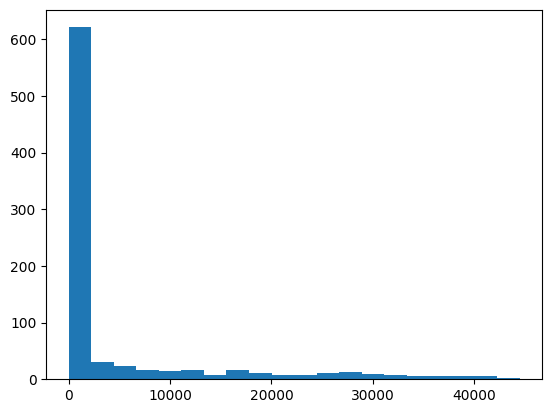

In [10]:
sizesOfFire=runSimulation(256,10**2,np.inf,0.2,0.01)
plt.hist(sizesOfFire,20)
plt.show()

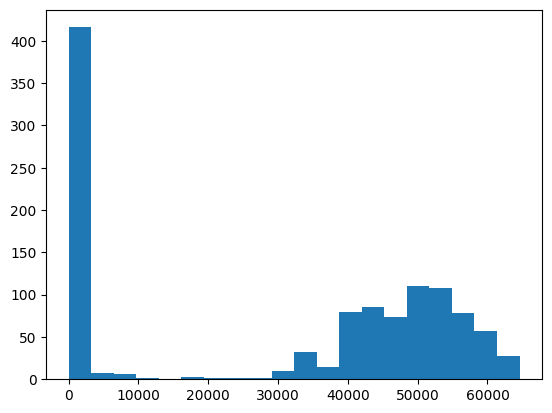

In [6]:
sizesOfFire=runSimulationNoPlot(256,10**4,np.inf,0.2,0.1)
plt.hist(sizesOfFire,20)
plt.show()

most fires are small fires whit this parameters 

if you increas the tree growt rate and decrease the lightning probability the size of big fires is increased

Exercise 3.4

In [8]:
sizesOfFiresN16=runSimulationNoPlot(16,np.inf,5000,0.2,0.01)
sizesOfFiresN256=runSimulationNoPlot(256,np.inf,5000,0.2,0.01)

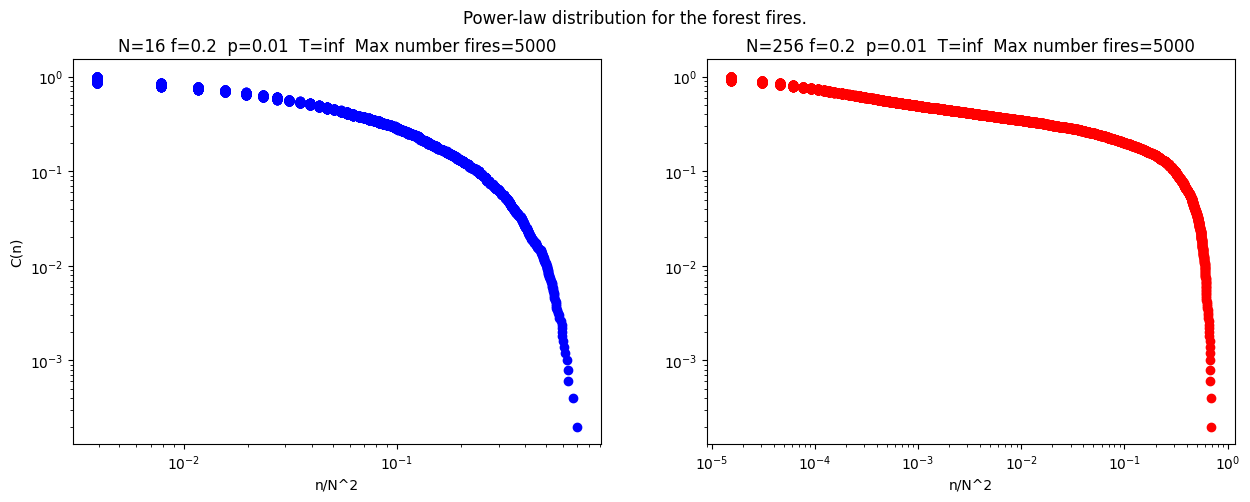

In [9]:
import matplotlib.pyplot as plt

#For N=16
N=16
x16,y16= getValues(sizesOfFiresN16,N)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1.plot(x16,y16,'o',color='b', label='N = 16') 
ax1.set_title('N=' + str(N) +' f='+str(0.2)+ '  p='+str(0.01) +'  T='+str(np.inf) + '  Max number fires='+str(5000)) 

#FOR N=256
N=256
x256,y256= getValues(sizesOfFiresN256,N)
ax2.plot(x256,y256,'o',color='r', label='N = 256') 
ax2.set_title('N=' + str(N) +' f='+str(0.2)+ '  p='+str(0.01) +'  T='+str(np.inf) + '  Max number fires='+str(5000)) 
  
# Naming the x-axis, y-axis and the whole graph 
ax1.set_xlabel("n/N^2") 
ax1.set_ylabel("C(n)") 
ax2.set_xlabel("n/N^2") 

fig.suptitle("Power-law distribution for the forest fires.") 

ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.show()

With N increasing the linear section of the plot becomes longer. This becouse if N-> infinity the should be only linear. The reson tahta the plot bends down are that te fires cant be larger then the NxN grid.

3.5a

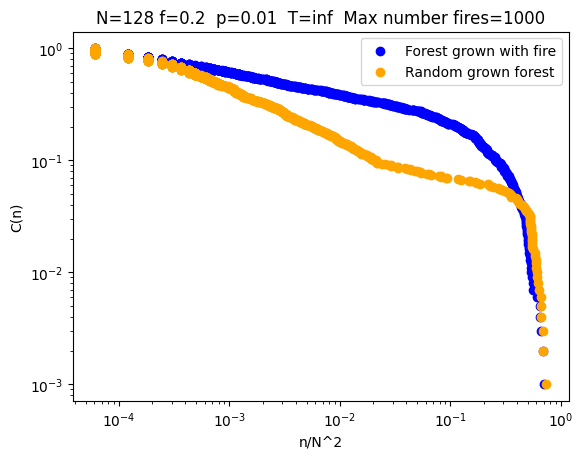

In [10]:
import numpy as np
N=128
p=0.01 #growth parameter 
f=0.2 #lighning probability
T=np.inf
MAXFires=1000
plotBunrntAndRandomForest(N,T,MAXFires,f,p)


Her we can clearly see the diffrance bettwen tha random forrest and the burnt down one. 
The burnt down does have a higer probability of having a fire that is larger then n for n that are in the middle of the n=1 and n=N^2. Therfore a randomly generated forest would create a forest with lower probability of creating big fires


3.5b

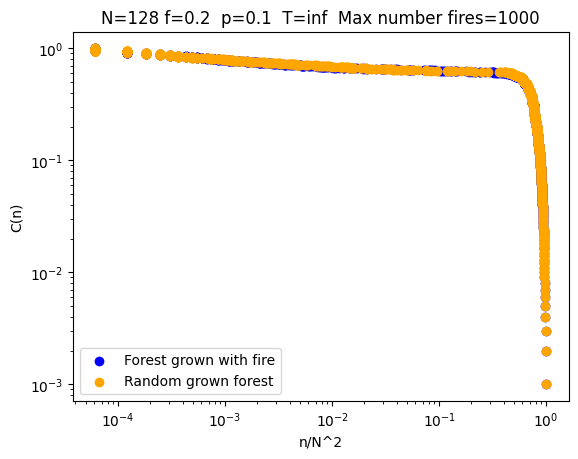

In [11]:
import numpy as np
N=128
p=0.1 #growth parameter 
f=0.2 #lighning probability
T=np.inf
MAXFires=1000#5000
plotBunrntAndRandomForest(N,T,MAXFires,f,p)


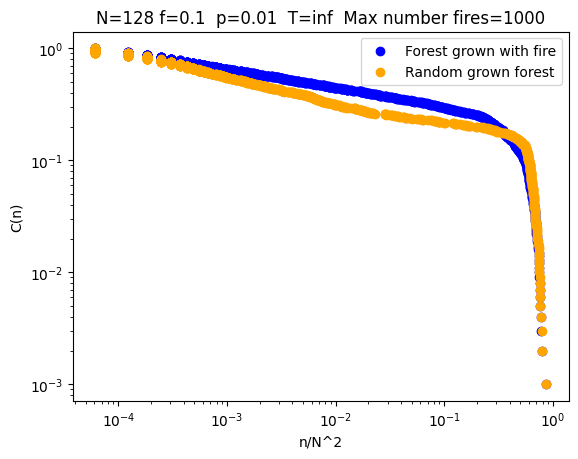

In [12]:
import numpy as np
N=128
p=0.01 #growth parameter 
f=0.1 #lighning probability
T=np.inf
MAXFires=1000#5000
plotBunrntAndRandomForest(N,T,MAXFires,f,p)

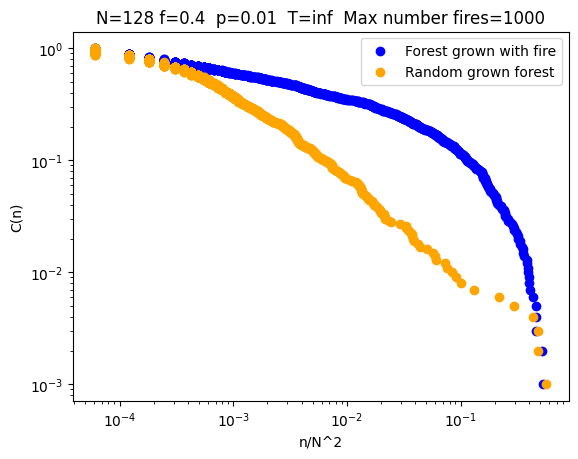

In [13]:
import numpy as np
N=128
p=0.01 #growth parameter 
f=0.4 #lighning probability
T=np.inf
MAXFires=1000#5000
plotBunrntAndRandomForest(N,T,MAXFires,f,p)

If the probobality of lighning increases and the growthrate  decrerase the diffrance bettwen random and bunrt are larger  and if the the ligtning prob is small and the growth is large then the the diffrance between random and burnt forest are smaller. Random forest is better than bunrt if you want to create smaller forrest fires that could be handle by the fire fighters. 

3.6

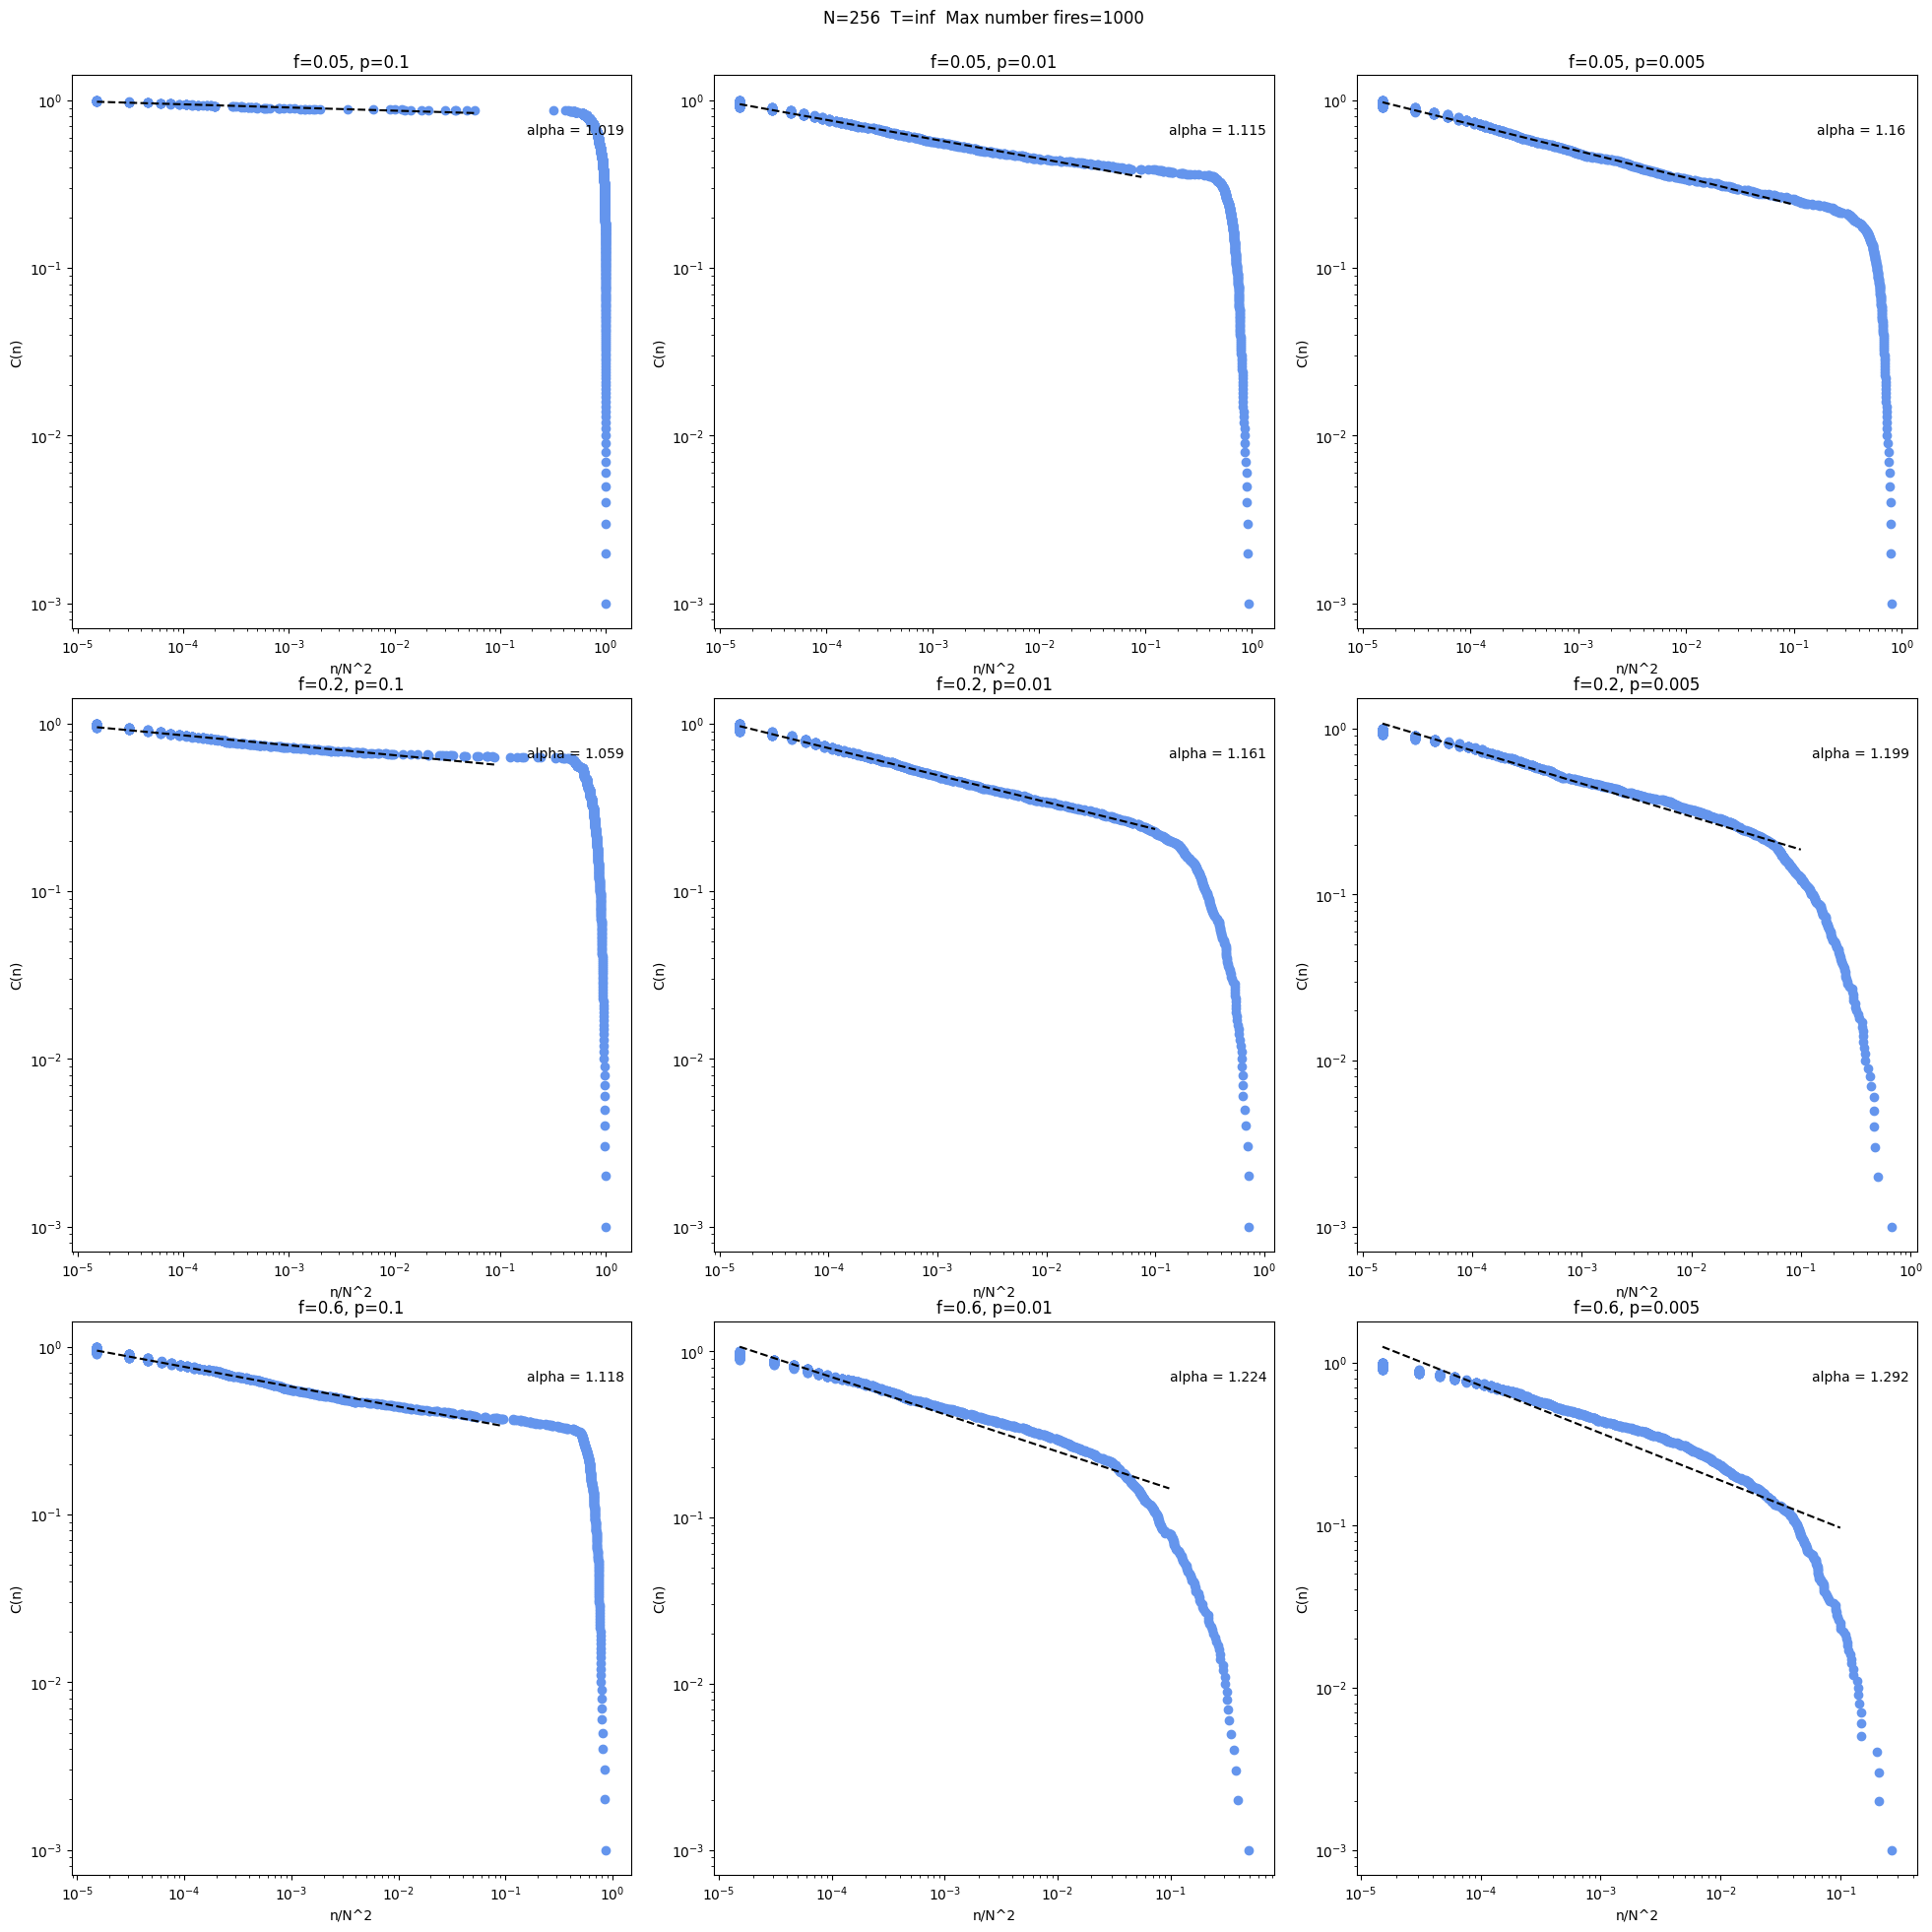

In [14]:
PlotSimulatedDataWithAlpha(256,np.inf,1000,[0.05,0.2,0.6],[0.1,0.01,0.005])

my findings is that when lighnting prob = 0.2 and growth rate = 0.01 alpha=1.161 is a littel bit higher then the predicted alpha=1.15 for the N-> inf but prety close. with less ligtningn and faster growth rate alpha is smaller and with opsite alpha is larger     

3.7


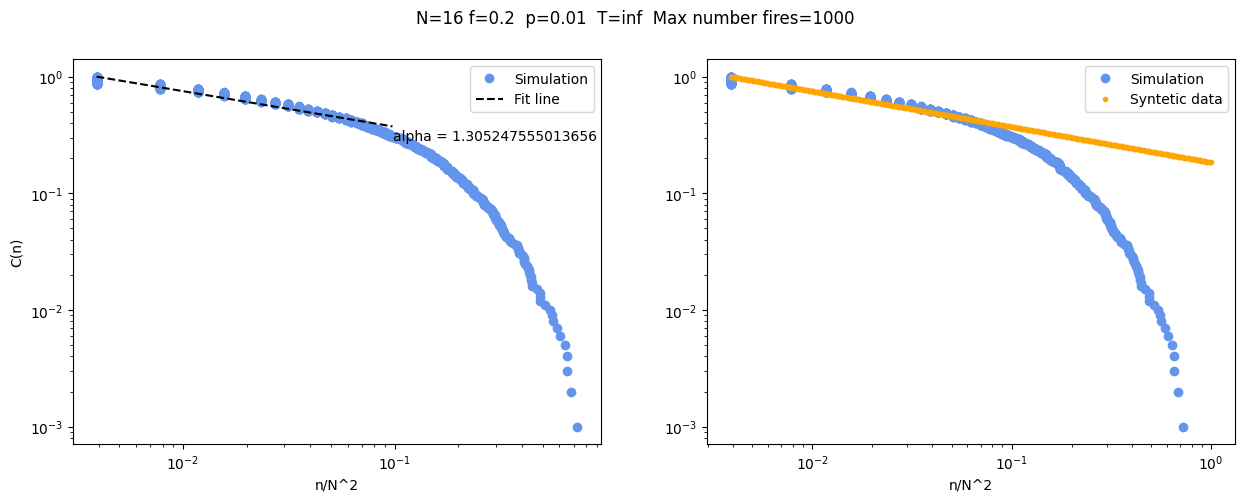

In [16]:
import numpy as np
N=16
p=0.01 #growth parameter 
f=0.2 #lighning probability
T=np.inf
MAXFires=1000
PlotSimulatedDataVsSyntetic(N,T,MAXFires,f,p)


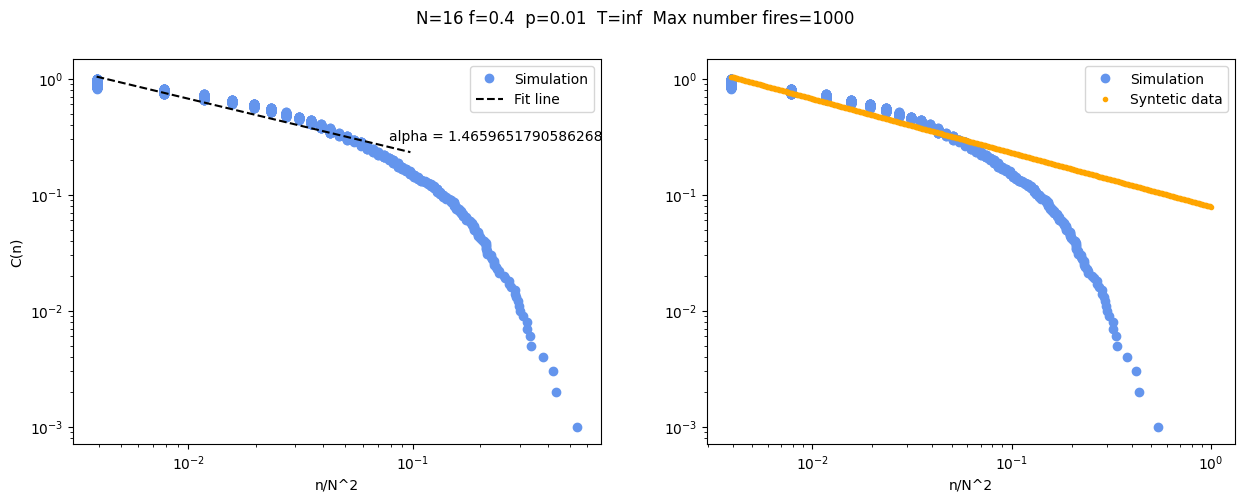

In [17]:

PlotSimulatedDataVsSyntetic(N,T,MAXFires,0.4,0.01)

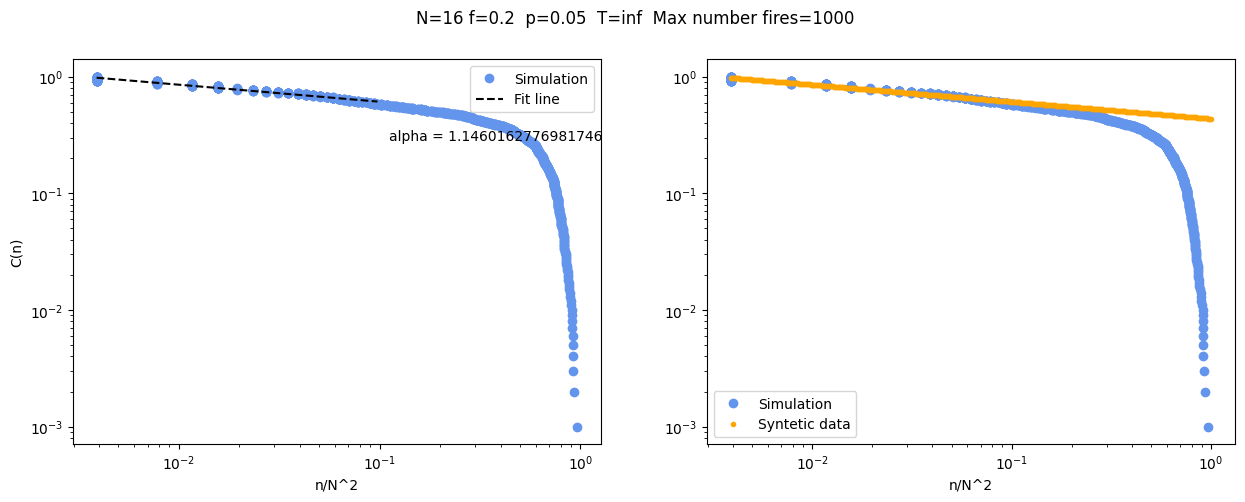

In [18]:
PlotSimulatedDataVsSyntetic(N,T,MAXFires,0.2,0.05)

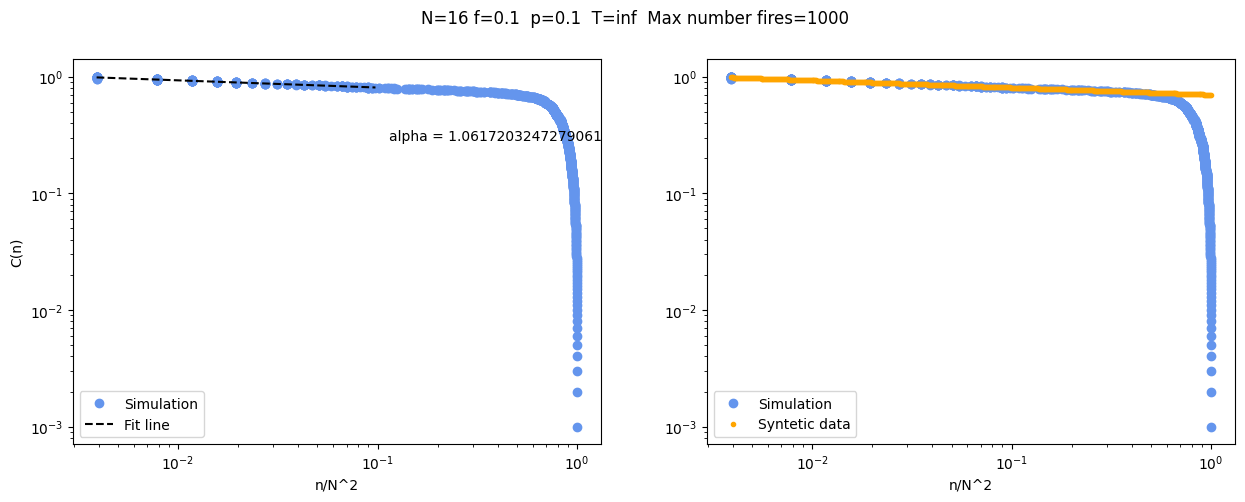

In [33]:
T=np.inf
MAXFires=1000
PlotSimulatedDataVsSyntetic(16,T,MAXFires,0.1,0.1)

My plot looks simmilar to the plot 3.5 in the book 
the reletive fire sizes  that are close to one rarrly happens this becous then all trees on the map need to be grown up when the lightning happens. Therfore a wehn lignting prob is low and growth rate is hige the relative fire size close to one happens often and the diffrance bettwen the syntetic data is less. and the oppsitet if lighntin happens often and growth rate is low and the diffrance beetwen to the syntetic data is bigger 


3.8

In [20]:
import pickle 
maxRuns=np.inf
maxFires=250
f=0.2
p=0.01
runs=10
Ns=[16, 32, 64, 128, 256, 512, 1024]
alphas=np.zeros((len(Ns),runs))
for row in range(len(Ns)):
    for col in range(runs):
        N=Ns[row]
        alpha=CalculateAlpha(N,maxRuns,maxFires,f,p)
        alphas[row,col]=alpha



    
# Open a file and use dump() 
with open('file2.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(alphas, file) 

In [21]:
#with open('file.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
#    myvar = pickle.load(file) 
  
#    print(myvar) 

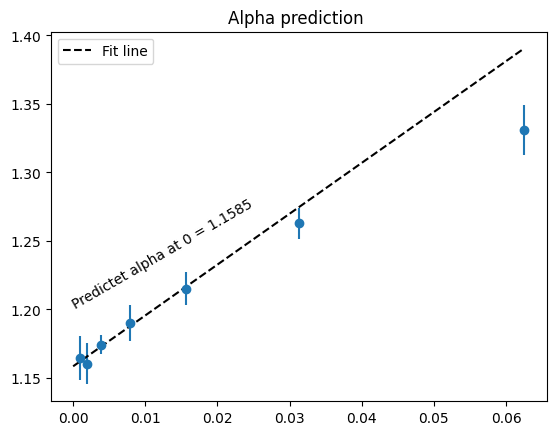

In [27]:
import matplotlib.pyplot as plt

medianAlphas=np.median(alphas,axis=1)
meanAlphas=np.mean(alphas,axis=1)

minAlphas=np.min(alphas,axis=1)
maxAlphas=np.max(alphas,axis=1)
error=np.std(alphas,axis=1)

k=3
n=len(meanAlphas)+k

x = [ 1/2**j for j in range(1,n+1) ][k:]

fig = plt.figure()
ax = plt.gca()

ax.errorbar(x, meanAlphas, yerr=error, fmt='o')
ax.set_title('Alpha prediction ')
#np.log(C)=(1-alpha)*np.log(n)+c
a,b= np.polyfit(x[2:],meanAlphas[2:],1)
xLine=np.array([0,1/16])

yLine=a*xLine+b
ax.plot(xLine,yLine,linestyle='dashed',color='k', label='Fit line')
textString=('Predictet alpha at 0 = '+str(round(b,4)))
ax.text(0.05, 0.25, textString, transform=ax.transAxes,rotation = 30, 
         rotation_mode = 'anchor') 
ax.legend()

plt.show()

here a linear fit is made using bny using the 5 points with the smallest N^-1 = data points this becouse the sems to be on a straight line. 

i got a prediction of 1.1585 wwhich is a close prediction to the expected value of 1.15.
